## Оглавление:
* [Шаг 1. Откройте файл](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* [Шаг 3. Посчитайте и добавьте в таблицу](#third-bullet)
* [Шаг 4. Проведите исследовательский анализ данных ](#fourth-bullet)
* [Шаг 5. Общий вывод](#fifth-bullet)

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="first-bullet"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
# Хочу увидеть все столбцы
one = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan']
two = ['kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']
df[one].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan
8960,6,6700000.0,67.2,2016-06-02T00:00:00,3,2.80,3.0,44.0,1,False,False,False
22803,13,15400000.0,178.1,2019-02-14T00:00:00,5,3.60,4.0,122.0,4,NaN,False,False
16945,13,6900000.0,42.4,2018-04-03T00:00:00,1,NaN,25.0,16.1,12,NaN,False,False
4599,8,1100000.0,29.7,2018-07-16T00:00:00,1,2.50,5.0,15.3,5,NaN,False,False
17217,10,3500000.0,41.0,2017-05-06T00:00:00,1,NaN,23.0,16.0,8,NaN,False,False
19409,19,20000000.0,79.0,2018-06-28T00:00:00,3,NaN,5.0,53.0,2,NaN,False,False
16067,9,3990000.0,41.0,2017-01-25T00:00:00,1,2.75,17.0,18.0,12,NaN,False,False
9331,11,2800000.0,33.4,2019-01-05T00:00:00,1,2.80,9.0,18.0,8,NaN,False,False
19710,12,3750000.0,35.0,2018-02-23T00:00:00,1,3.50,3.0,22.0,3,NaN,False,False
11608,15,4500000.0,42.0,2018-07-24T00:00:00,1,2.69,4.0,NaN,4,False,False,False


In [4]:
df[two].sample(10)

,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2136,6.00,0.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,90.0
10860,8.84,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8248,14.00,NaN,Санкт-Петербург,33865.0,14964.0,1.0,610.0,2.0,593.0,NaN
4449,14.00,NaN,Санкт-Петербург,31481.0,12074.0,0.0,NaN,0.0,NaN,68.0
20478,10.00,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
4710,15.00,0.0,Санкт-Петербург,22656.0,4288.0,1.0,556.0,0.0,NaN,175.0
10379,NaN,NaN,Санкт-Петербург,46537.0,16823.0,1.0,644.0,0.0,NaN,40.0
1857,8.21,1.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,22.0
9182,9.00,1.0,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,329.0
6565,13.80,2.0,Санкт-Петербург,21327.0,23039.0,0.0,NaN,2.0,250.0,31.0


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

### Вывод

В таблице 22 столбца и 23699 строки. В половине столбцов втречаются пропущенные значения, некоторые попробуем восстановить в зависимости от других показателей, а те у которых такой зависимости нет, думаю лучше оставить как есть.

### Шаг 2. Предобработка данных <a name="second-bullet"></a>

In [6]:
# Проверим на наличие дубликатов и поменяем тип данных в дате
df['locality_name'] = df['locality_name'].str.lower()
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Почти половина информации в столбце с балконами отсутствует. Скорее всего пропуски связаны с отсутсвием балконов, поэтому заменим их на ноль. Заменить эти данные в разрезе других показателей не представляется возможным, т.к. в двух  квартирах в одном и том же доме, этаже и при прочих равных условиях может быть разное количество балконов.

In [9]:
df['balcony'] = df['balcony'].fillna(value=0)
df[two].sample(10)

,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12624,8.1,0.0,санкт-петербург,32043.0,9121.0,3.0,262.0,1.0,711.0,564.0
3894,32.0,0.0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16612,9.8,0.0,санкт-петербург,29191.0,8038.0,1.0,304.0,0.0,NaN,108.0
19971,5.0,0.0,ломоносов,47943.0,51368.0,0.0,NaN,0.0,NaN,25.0
20808,5.1,0.0,санкт-петербург,38705.0,10390.0,1.0,487.0,1.0,687.0,8.0
217,10.0,1.0,санкт-петербург,49666.0,16010.0,0.0,NaN,0.0,NaN,122.0
1020,12.5,0.0,санкт-петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,115.0
3356,4.2,1.0,санкт-петербург,10900.0,14479.0,1.0,684.0,1.0,159.0,27.0
6381,13.0,2.0,посёлок шушары,11654.0,17440.0,0.0,NaN,0.0,NaN,133.0
14043,8.0,0.0,санкт-петербург,17665.0,16668.0,1.0,74.0,2.0,788.0,60.0


Данные с названием населенного пункта нельзя хоть с какой-то точностью восстановить в зависимости от других показателей, а без информации о местонахождении квартиры непонятно как использовать эти строки, поэтому от них проще избавиться. Тем более их доля всего 0,2%

In [10]:
df.dropna(subset=['locality_name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_a

Пропущенные данные в жилой площади и площади кухни заменим на медианные значения для квартир с такой же общей площадью.

In [11]:
df['kitchen_area'] = df['kitchen_area'].fillna(value = 0)
df.loc[df['kitchen_area'] == 0, 'kitchen_area'] = df.groupby('total_area')['kitchen_area'].transform('median')
df['living_area'] = df['living_area'].fillna(value = 0)
df.loc[df['living_area'] == 0, 'living_area'] = df.groupby('total_area')['living_area'].transform('median')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,74.5,9,NaN,...,15.0,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски в высоте потолков попробуем заменить на медианные, в зависимости от общей площади квартиры. Оставшиеся значения заменим на медиану.

In [12]:
df['ceiling_height'].median()

2.65

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(value = 0)
df.loc[df['ceiling_height'] == 0, 'ceiling_height'] = df.groupby('total_area')['ceiling_height'].transform('median')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_a

In [14]:
df['ceiling_height'] = df['ceiling_height'].replace(0, 2.65)

In [15]:
df.query('ceiling_height == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
df.query('ceiling_height >= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,7.8,2.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,санкт-петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,15.4,1,False,...,6.1,0.0,бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,0.0,6,NaN,...,0.0,0.0,санкт-петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,санкт-петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,0.0,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0.0,санкт-петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


В высоте потолков с некоторыми данными возможно произошла ошибка, или просто забыли запятую, т.к. встречаются очень большие значения, например, 25 или 27 метров. Разделим все данные больше 15 на 10.

In [17]:
df.loc[df['ceiling_height'] > 15, 'ceiling_height'] = df['ceiling_height'] / 10
df.query('ceiling_height >= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,санкт-петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,15.4,1,False,...,6.1,0.0,бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,0.0,6,NaN,...,0.0,0.0,санкт-петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,санкт-петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,NaN,...,29.0,1.0,санкт-петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,30.0,5,NaN,...,8.0,0.0,санкт-петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,санкт-петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,...,8.0,0.0,санкт-петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0


In [18]:
df['is_apartment'] = df['is_apartment'].fillna(value = '')
df['floors_total'] = df['floors_total'].fillna(value = 0)

В столбце с количеством комнат встречались нули. Посмотрим на эти строки.

In [19]:
df.query('rooms == 0').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4683,2,3650000.0,35.00,2018-02-01,0,2.50,25.0,23.40,25,,...,8.40,0.0,санкт-петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100.0
19154,8,2500000.0,23.80,2018-02-26,0,2.70,11.0,18.80,10,,...,3.00,1.0,отрадное,NaN,NaN,NaN,NaN,NaN,NaN,74.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,,...,0.00,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
15109,4,2320000.0,24.40,2018-01-01,0,2.74,24.0,13.56,6,,...,0.00,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,5.0
6805,7,1850000.0,31.00,2017-11-10,0,2.50,18.0,18.00,10,,...,6.00,1.0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,7.0
16144,7,2500000.0,22.30,2019-01-11,0,2.65,21.0,18.00,7,,...,0.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,4.0
22246,6,3100000.0,27.30,2018-05-29,0,2.70,16.0,23.30,15,,...,0.00,1.0,санкт-петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
2055,14,2300000.0,29.00,2018-03-29,0,2.60,26.0,22.00,9,,...,6.10,2.0,поселок городского типа имени свердлова,NaN,NaN,NaN,NaN,NaN,NaN,115.0
2727,4,3670000.0,26.49,2018-07-26,0,2.60,21.0,19.00,4,,...,0.00,1.0,санкт-петербург,36579.0,9092.0,0.0,NaN,1.0,454.0,28.0
2991,3,3700000.0,28.90,2017-11-09,0,2.50,17.0,19.90,3,,...,5.75,2.0,санкт-петербург,9655.0,13255.0,1.0,980.0,1.0,1093.0,20.0


Исходя из того, что площадь этих квартир небольшая, скорее всего информацию о количестве комнат не указали, т.к. в квартире она одна или это студия. Заменим ноль на "1".

In [20]:
df['rooms'] = df['rooms'].replace(0, 1)
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Количество балконов, этажей поменяем на целые, т.к. они не могут быть не целыми. В столбце 'is_apartment' поменяем тип данных на 'bool'.

In [21]:
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around

В таблице были обнаружены пропуски в столбцах:
высота потолков, жилая площадь, площадь кухни - их заменили на медианные значения, в зависимости от общей площади жилья;
количество этажей, количество балконов - эти пропуски заменили на "0". В случае с балконами скорее всего так и есть, а в случае с этажами заменить пропуски на правдоподобные значения невозможно;
апартаменты - заменены на пропуск и поменяли на булев тип.
дни размещения объявления - заменили на медиану по этому столбцу; 
название населенного пункта - удалили эти строки совсем.
Какой-то обоснованной замены для пропусков в столбцах связанных с расстоянием до каких-либо объектов (аэропорта, парков и т.д.) я не вижу, поэтому они оставлены как есть.
В столбцах с количеством комнат были обнаружены нулевые значия, которые заменили на "1" и высотой потолков - слишком большие значения, которые разделили на 10.

### Шаг 3. Посчитайте и добавьте в таблицу <a name="third-bullet"></a>

In [22]:
# Добавляем цену квадратного метра
df['price_for_m'] = df['last_price'] / df['total_area']
# Добавляем этаж квартиры
def category_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(category_floor, axis=1)
df.loc[13:16]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_category
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,последний
14,1,4400000.0,36.0,2016-06-23,1,2.65,6,17.0,1,False,...,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.222222,первый
15,16,4650000.0,39.0,2017-11-18,1,2.50,14,20.5,5,False,...,санкт-петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230.769231,другой
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,санкт-петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,первый


In [23]:
# день недели, месяц и год публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year
df['exposition_month'] = df['first_day_exposition'].dt.month
df['day_of_week'] = df['first_day_exposition'].dt.weekday_name
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,другой,2019,3,Thursday
1,7,3350000.0,40.40,2018-12-04,1,2.600,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,первый,2018,12,Tuesday
2,10,5196000.0,56.00,2015-08-20,2,2.500,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,другой,2015,8,Thursday
3,0,64900000.0,159.00,2015-07-24,3,2.650,14,74.5,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,другой,2015,7,Friday
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,другой,2018,6,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,другой,2017,3,Tuesday
23695,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.372881,другой,2018,1,Monday
23696,18,2500000.0,56.70,2018-02-11,2,2.505,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.710758,первый,2018,2,Sunday
23697,13,11475000.0,76.75,2017-03-28,2,3.000,17,0.0,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,другой,2017,3,Tuesday


In [24]:
# Соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['living_area_to_total'] = df['living_area'] / df['total_area']
df['kitchen_area_to_total'] = df['kitchen_area'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week,living_area_to_total,kitchen_area_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,другой,2019,3,Thursday,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.600,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,первый,2018,12,Tuesday,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.500,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,другой,2015,8,Thursday,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.650,14,74.5,9,False,...,3.0,234.0,424.0,408176.100629,другой,2015,7,Friday,0.468553,0.094340
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,другой,2018,6,Tuesday,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700,5,73.3,3,False,...,3.0,381.0,NaN,72490.845228,другой,2017,3,Tuesday,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.0,4,False,...,NaN,NaN,45.0,52542.372881,другой,2018,1,Monday,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.505,3,29.7,1,False,...,NaN,NaN,NaN,44091.710758,первый,2018,2,Sunday,0.523810,0.141093
23697,13,11475000.0,76.75,2017-03-28,2,3.000,17,0.0,12,False,...,3.0,196.0,602.0,149511.400651,другой,2017,3,Tuesday,0.000000,0.303583


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a name="fourth-bullet"></a>

In [25]:
# Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
# Площадь
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество объявлений')

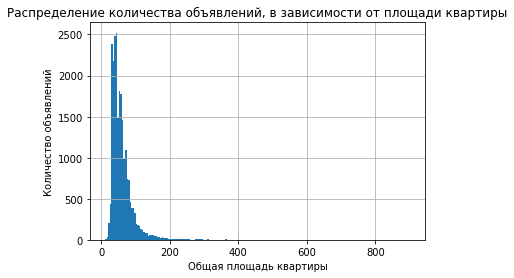

In [26]:
df.hist('total_area', bins=200, range=(12, 900))
plt.title('Распределение количества объявлений, в зависимости от площади квартиры')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество объявлений')

Минимальная площадь составляет 12кв.м, а максимальная - 900кв.м. При этом основная часть рассматриваемых квартир имеет площадь до 200кв.м.

In [27]:
# Цена 
df['price_for_m'].describe()

count    2.365000e+04
mean     9.943225e+04
std      5.033794e+04
min      1.118349e+02
25%      7.661497e+04
50%      9.500000e+04
75%      1.142742e+05
max      1.907500e+06
Name: price_for_m, dtype: float64

In [28]:
df.query('price_for_m < 10000 or price_for_m > 1000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week,living_area_to_total,kitchen_area_to_total
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3.0,285.0,233.0,1.736842e+06,другой,2018,4,Wednesday,0.500000,0.210526
4405,9,500000.0,52.0,2018-08-02,2,2.70,2,31.0,1,False,...,NaN,NaN,110.0,9.615385e+03,первый,2018,8,Thursday,0.596154,0.153846
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0.0,NaN,8.0,1.118349e+02,последний,2019,3,Wednesday,0.293578,0.371560
12971,19,763000000.0,400.0,2017-09-30,7,2.50,10,250.0,10,False,...,3.0,756.0,33.0,1.907500e+06,последний,2017,9,Saturday,0.625000,0.000000
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,1.0,478.0,393.0,1.000748e+06,последний,2016,2,Saturday,0.508728,0.059850
14911,5,430000.0,54.0,2018-06-26,2,2.50,3,30.0,3,False,...,NaN,NaN,44.0,7.962963e+03,последний,2018,6,Tuesday,0.555556,0.157407
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,3.0,188.0,NaN,1.542605e+06,последний,2019,3,Tuesday,0.339733,0.161067


Text(0, 0.5, 'Количество объявлений')

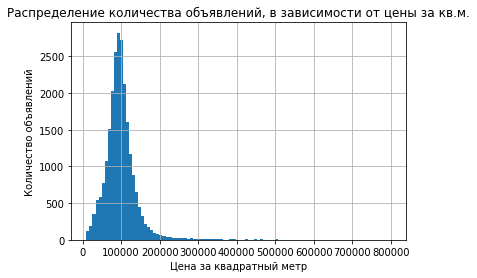

In [29]:
df.hist('price_for_m', bins=100, range=(10000, 800000))
plt.title('Распределение количества объявлений, в зависимости от цены за кв.м.')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Количество объявлений')

Text(0.5, 1.0, 'Распределение стоимости')

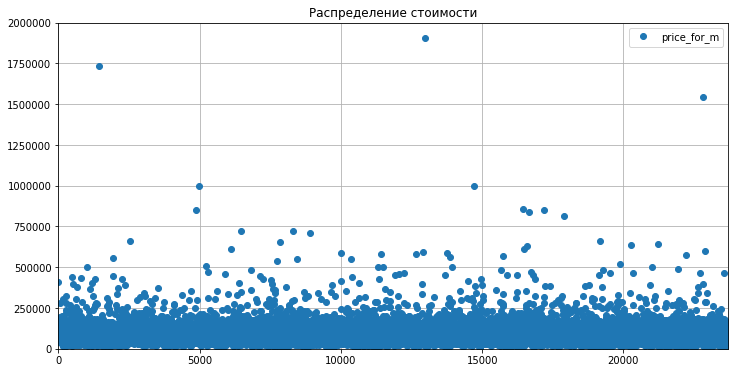

In [30]:
df.plot(y='price_for_m', style='o', ylim=(0, 2000000), grid=True, figsize=(12, 6))
plt.title('Распределение стоимости')

Стоимость квадратного метра в рассматриваемых квартирах сильно отличается, и принимает значение от 111 до 1,9млн. Не могу утверждать, что кв.м не может стоить 1,9 млн.руб., но он точно не может стоить 111 руб., а вся двухкомная квартира в 25ти этажном доме - 12000руб., похоже, что в данных есть ошибки. БОльшая часть объявлений укладывается в стоимость до 250тыс. за кв.метр. Ценник выше этого значения - редкость.

In [31]:
# Количество комнат
df['rooms'].describe()

count    23650.000000
mean         2.078436
std          1.066393
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Количество объявлений')

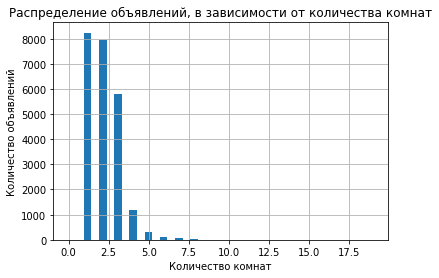

In [32]:
df.hist('rooms', bins=40, range=(0, 19))
plt.title('Распределение объявлений, в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

Встречаются объявления о продаже квартир с количеством комнат от 1 до 19, но в целом больше 5 - это редкость. Чаще всего продают квартиры с одной или двумя комнатами.

In [33]:
# Высота потолков
df['ceiling_height'].describe()

count    23650.000000
mean         2.645966
std          0.317002
min          1.000000
25%          2.500000
50%          2.600000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество объявлений')

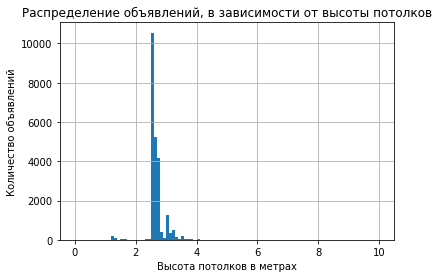

In [34]:
df.hist('ceiling_height', bins=100, range=(0, 10))
plt.title('Распределение объявлений, в зависимости от высоты потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество объявлений')

In [35]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение продажи квартиры - 180 дней, что в два раза меньше медианного значения равного 95 дням. 

Text(0, 0.5, 'Количество объявлений')

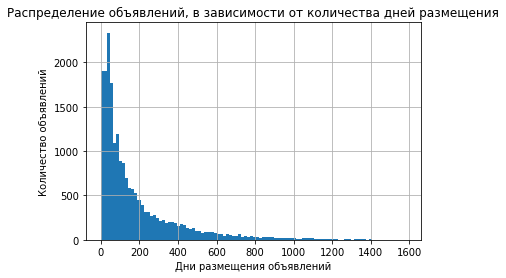

In [36]:
df.hist('days_exposition', bins=100, range=(0, 1580))
plt.title('Распределение объявлений, в зависимости от количества дней размещения')
plt.xlabel('Дни размещения объявлений')
plt.ylabel('Количество объявлений')

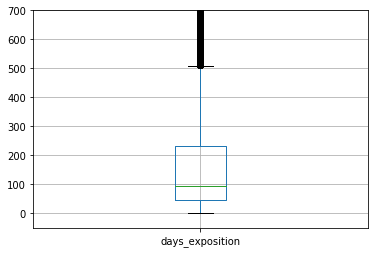

In [37]:
plt.ylim(-50, 700)
df.boxplot('days_exposition')

В большинстве случаев продажа квартиры занимает до 230 дней. В случае, когда продажа квартиры заняла менее 22 дней, можно считать, что продажа прошла очень быстро, а в случае более 450 дней - необычно долгие продажи.

В данных есть значения сильно отличающиеся от большинства. Уберем такие выбивающиеся из общего числа значения. С помощью boxplot определим границы за пределами которых значения можно считать значительными выбросами. 

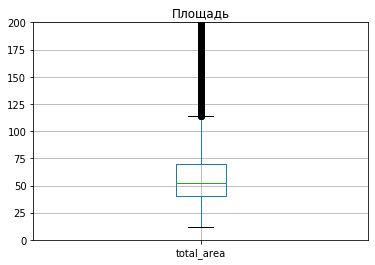

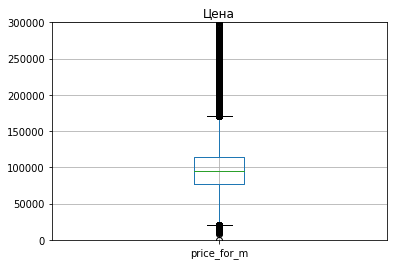

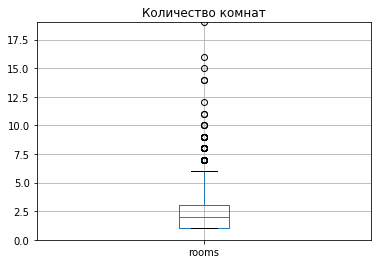

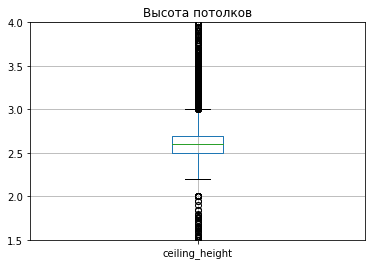

In [38]:
param_dict = {
'total_area': {'ylim': (0, 200),  'title': 'Площадь'},
'price_for_m': {'ylim': (-50, 300000),  'title': 'Цена'},
'rooms': {'ylim': (0, 19),  'title': 'Количество комнат'},
'ceiling_height': {'ylim': (1.5, 4),  'title': 'Высота потолков'}
}
for key, value in param_dict.items():
    df.boxplot([key])
    plt.ylim(value['ylim'])
    plt.title(value['title'])
    plt.show()

In [39]:
df_slice = df.query( 
'(10 < total_area < 115) and (20000 < price_for_m < 170000) and (1 <= rooms <= 6) and (2.25 <= ceiling_height <= 3)')
df_slice

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week,living_area_to_total,kitchen_area_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,другой,2019,3,Thursday,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.600,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,первый,2018,12,Tuesday,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.500,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,другой,2015,8,Thursday,0.612500,0.148214
5,10,2890000.0,30.40,2018-09-10,1,2.500,12,14.4,5,False,...,NaN,NaN,55.0,95065.789474,другой,2018,9,Monday,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.500,26,10.6,6,False,...,0.0,NaN,155.0,99195.710456,другой,2017,11,Thursday,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.600,9,40.0,8,False,...,1.0,675.0,239.0,73717.948718,другой,2016,8,Friday,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.0,4,False,...,NaN,NaN,45.0,52542.372881,другой,2018,1,Monday,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.505,3,29.7,1,False,...,NaN,NaN,NaN,44091.710758,первый,2018,2,Sunday,0.523810,0.141093
23697,13,11475000.0,76.75,2017-03-28,2,3.000,17,0.0,12,False,...,3.0,196.0,602.0,149511.400651,другой,2017,3,Tuesday,0.000000,0.303583


In [40]:
# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, 
# числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, 
# последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [41]:
df_slice['day_of_week'].value_counts()

Thursday     3635
Tuesday      3615
Friday       3453
Wednesday    3388
Monday       3111
Saturday     1675
Sunday       1500
Name: day_of_week, dtype: int64

Text(0.5, 1.0, 'Зависимость цены от дня недели')

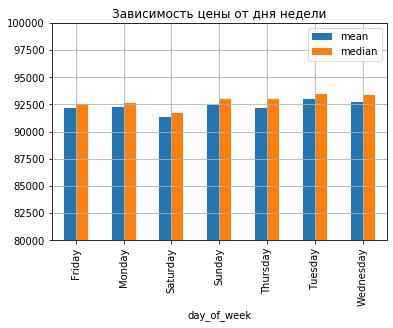

In [42]:
df_group = df_slice.pivot_table(index='day_of_week', values='price_for_m', aggfunc={'mean', 'median'}) 
df_group.plot(kind='bar', grid=True).set_ylim(80000,100000)
plt.title('Зависимость цены от дня недели')

Меньше всего объявлений публикуется в выходные дни: субботу и воскресенье. Ценник на кв.м. в субботу обычно на 1000 меньше, чем в остальные дни, но в целом по дням недели он отличается не сильно. Самый высокий ценник в середине недели: вторник и среду.

In [43]:
df_slice['exposition_year'].value_counts()

2018    7425
2017    7104
2019    2473
2016    2346
2015     944
2014      85
Name: exposition_year, dtype: int64

Text(0.5, 1.0, 'Зависимость цены от года')

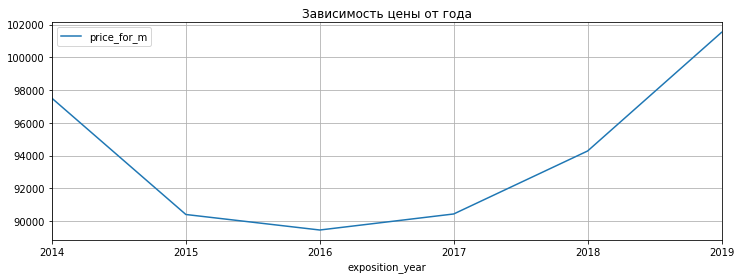

In [44]:
(df_slice  
     .pivot_table(index='exposition_year', values='price_for_m', aggfunc='median')
     .plot(grid=True, figsize=(12, 4))
 ) 
plt.title('Зависимость цены от года')

С 2016г. стоимость жилья ежегодно растет. Высокий показатель стоимости в 2014 году скорее всего из-за недостаточного количества данных - их всего 85.

In [45]:
df_slice['exposition_month'].value_counts()

2     2261
3     2236
4     2066
11    2042
10    1857
9     1686
6     1524
8     1501
7     1436
12    1396
1     1290
5     1082
Name: exposition_month, dtype: int64

Text(0.5, 1.0, 'Зависимость цены от месяца')

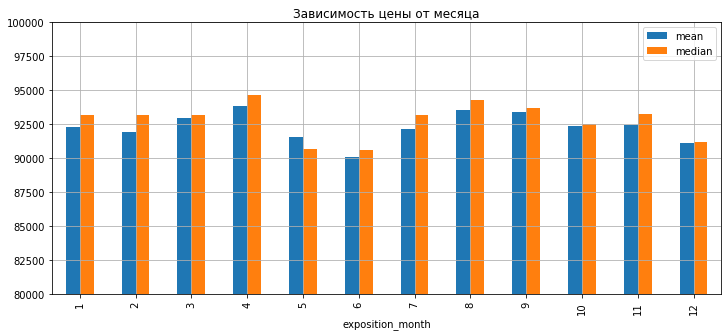

In [46]:
(df_slice  
     .pivot_table(index='exposition_month', values='price_for_m', aggfunc={'mean', 'median'})
     .plot(kind='bar', grid=True, figsize=(12, 5)).set_ylim(80000,100000)
) 
plt.title('Зависимость цены от месяца')

Text(0.5, 1.0, 'Зависимость цены от месяца публикации по годам')

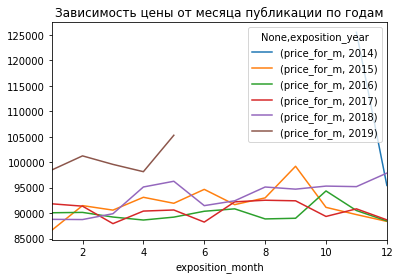

In [47]:
df_slice.pivot_table(index='exposition_month', columns='exposition_year', aggfunc={'price_for_m':'mean'}).plot()
plt.title('Зависимость цены от месяца публикации по годам')

По месяцам стоимость распределяется примерно на одном уровне, только в мае июне она незначительно снижалась, а в апреле и августе повышалась. Однако, если смотреть отдельно по годам среднемесячную стоимость, средняя стоимость распределяется по-другому. Думаю никакой зависимости цены от самого факта наступления какого-то месяца нет, скорее это связано с событиями происходящими в конкретный период времени. 

Text(0.5, 1.0, 'Доля предложений квартир на  разных этажах')

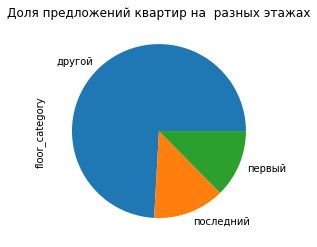

In [48]:
df_slice['floor_category'].value_counts().plot(kind='pie')
plt.title('Доля предложений квартир на  разных этажах')

Text(0.5, 1.0, 'Стоимость квартир в зависимости от этажа')

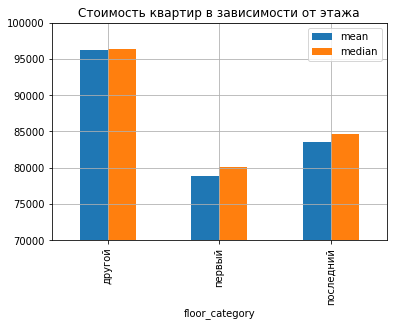

In [49]:
df_group_floor = df_slice.pivot_table(index='floor_category', values='price_for_m', aggfunc={'mean', 'median'}) 
df_group_floor.plot(kind='bar', grid=True).set_ylim(70000,100000)
plt.title('Стоимость квартир в зависимости от этажа')

Цена квартир на первых и последних этажах значительно отличается от всех остальных, примерно на 15 и 10 тысяч за кв.м. соответственно. 

In [50]:
df_slice['ceiling_height'].corr(df_slice['price_for_m'])

0.24331682217727715

Text(0, 0.5, 'Цена за кв.м.')

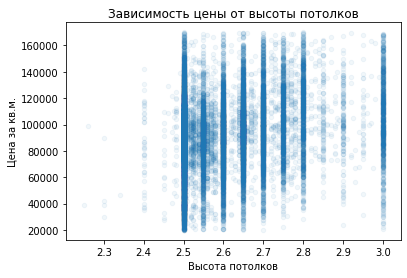

In [51]:
df_slice.plot(x='ceiling_height', y='price_for_m', kind='scatter', alpha=0.06)
plt.title('Зависимость цены от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Цена за кв.м.')

Высота потолков - точно не ключевой фактор влиящий на цену. Зависимоть между этими показателями есть, но она очень незначительная.

In [52]:
df_slice['total_area'].corr(df_slice['price_for_m'])

0.017318059441076485

Text(0, 0.5, 'Стоимость квартиры')

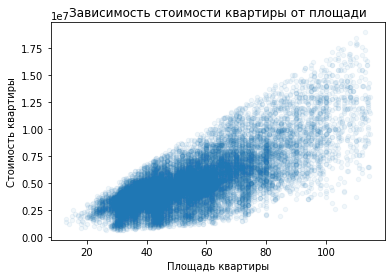

In [53]:
df_slice.plot(x='total_area', y='last_price', kind='scatter', alpha=0.06)
plt.title('Зависимость стоимости квартиры от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')

Стоимость квадратного метра не зависит от площади жилья, но общая стоимость квартиры, естественно, увеличивается с увеличением ее площади.

In [54]:
df_slice['rooms'].corr(df_slice['price_for_m'])

-0.17810579572581386

In [55]:
df_slice['rooms'].corr(df_slice['last_price'])

0.45810846669010175

Text(0.5, 1.0, 'Зависимость цены квардатного метра от количества комнат')

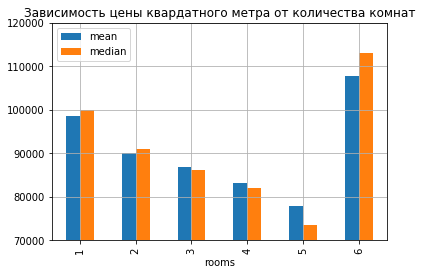

In [56]:
df_group_rooms = df_slice.pivot_table(index='rooms', values='price_for_m', aggfunc={'mean', 'median'}) 
df_group_rooms.plot(kind='bar', grid=True).set_ylim(70000,120000)
plt.title('Зависимость цены квардатного метра от количества комнат')

При увеличении количества комнат, стоимость квартиры возрастает, но цена за кв.м. при этом уменьшается.

In [57]:
df_slice['cityCenters_nearest'].corr(df_slice['price_for_m'])

-0.40084866902286026

Text(0, 0.5, 'Цена за кв.м.')

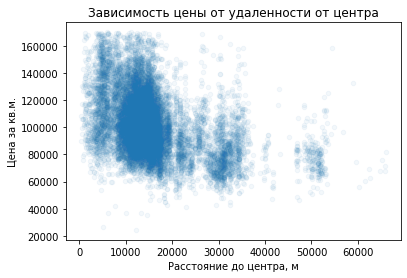

In [58]:
df_slice.plot(x='cityCenters_nearest', y='price_for_m', kind='scatter', alpha=0.05)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена за кв.м.')

Корреляция в -0,40 говорит о наличии связи, но не слишком сильной: при увеличении расстояния от центра, цена снижается.
              

In [59]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра 
# в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [60]:
top = (df_slice
       .groupby('locality_name')['price_for_m'].agg({'mean', 'count'})
       .sort_values(by='count', ascending=False)
       .head(10)
      )
top.columns = ('price_for_meter_mean', 'count_exposition')
top

,price_for_meter_mean,count_exposition
locality_name,,
санкт-петербург,105450.015648,12965
посёлок мурино,85775.132591,506
посёлок шушары,78770.431897,430
всеволожск,67296.800900,382
пушкин,101502.869142,328
колпино,75341.066400,320
посёлок парголово,90193.125202,317
деревня кудрово,92352.486737,293
гатчина,69186.811359,292


In [61]:
top.sort_values(by='price_for_meter_mean', ascending=False)

,price_for_meter_mean,count_exposition
locality_name,,
санкт-петербург,105450.015648,12965
пушкин,101502.869142,328
деревня кудрово,92352.486737,293
посёлок парголово,90193.125202,317
посёлок мурино,85775.132591,506
посёлок шушары,78770.431897,430
колпино,75341.066400,320
гатчина,69186.811359,292
всеволожск,67296.800900,382


По количеству объявлений и стоимости жилья лидирует Санкт-Петербург. Средняя стоимость квадратного метра здесь более 105тыс., а количество объявлений составляет 62% от общего числа предложений. Не сильно отличается от СПб стоимость жилья в Пушкине, всего на 3тыс., видимо из-за того, что это район Санкт-Петербурга. В Лен.области стоимость кв.м. отличается уже на 10тыс. и более. Из топ-10 населенных пунков по количеству предложений о продаже жилья самая низкая стоимость в Выборге - 58160.

In [62]:
# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры 
# в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец 
# с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого
# километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где 
# график сильно меняется — это и будет центральная зона.

Text(0, 0.5, 'Средняя цена за кв.м.')

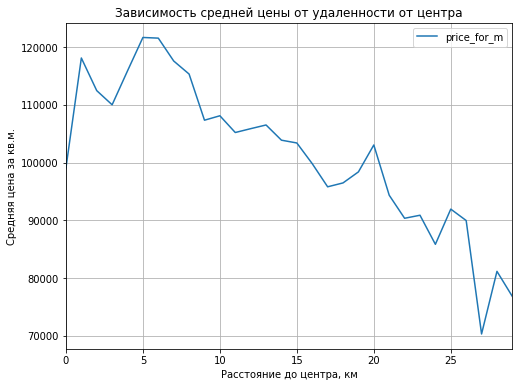

In [83]:
df_spb = df_slice.query('locality_name == "санкт-петербург"')
df_spb['cityCenters_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)
df_spb_mean_for_km = df_spb.groupby('cityCenters_km')['price_for_m'].mean().reset_index().sort_values('cityCenters_km')
df_spb_mean_for_km.plot(x='cityCenters_km', y='price_for_m', grid=True, figsize=(8, 6))
pd.set_option('mode.chained_assignment', None)
plt.title('Зависимость средней цены от удаленности от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за кв.м.')

График показывает как средняя цена меняется в зависимости от удаленности центра. В районе 8-9 км цена начинает сильно снижаться, думаю, именно здесь заканчивается центр.

In [64]:
# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, 
# число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, 
# удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [65]:
df_spb_center = df_spb.query('cityCenters_km < 9')
df_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week,living_area_to_total,kitchen_area_to_total,cityCenters_km
24,8,6500000.0,97.2,2015-10-31,2,2.50,3,46.5,1,False,...,124.0,265.0,66872.427984,первый,2015,10,Saturday,0.478395,0.201646,2.0
61,18,7990000.0,74.0,2017-08-24,2,2.50,4,43.0,4,False,...,NaN,609.0,107972.972973,последний,2017,8,Thursday,0.581081,0.270270,4.0
70,9,3400000.0,30.0,2018-09-05,1,2.50,5,16.0,1,False,...,NaN,14.0,113333.333333,первый,2018,9,Wednesday,0.533333,0.233333,8.0
94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,NaN,4.0,118644.067797,другой,2019,4,Friday,0.528814,0.186441,7.0
99,32,9600000.0,90.0,2017-09-26,4,2.75,5,67.0,2,False,...,NaN,104.0,106666.666667,другой,2017,9,Tuesday,0.744444,0.088889,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,171.0,166.0,79840.000000,последний,2018,4,Thursday,0.516800,0.193600,4.0
23665,11,4250000.0,47.0,2016-05-20,1,2.50,6,18.2,1,False,...,519.0,131.0,90425.531915,первый,2016,5,Friday,0.387234,0.310638,5.0
23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,660.0,80.0,122093.023256,другой,2018,5,Friday,0.674419,0.139535,7.0
23690,3,5500000.0,52.0,2018-07-19,2,2.50,5,31.0,2,False,...,NaN,15.0,105769.230769,другой,2018,7,Thursday,0.596154,0.115385,6.0


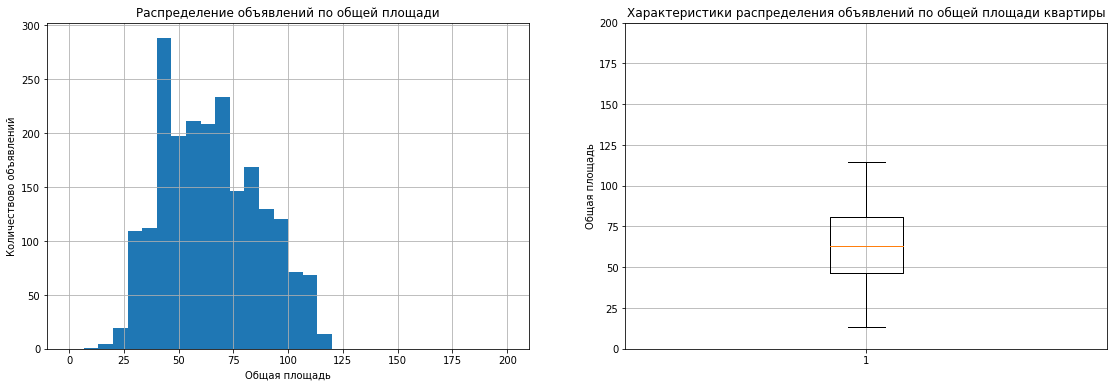

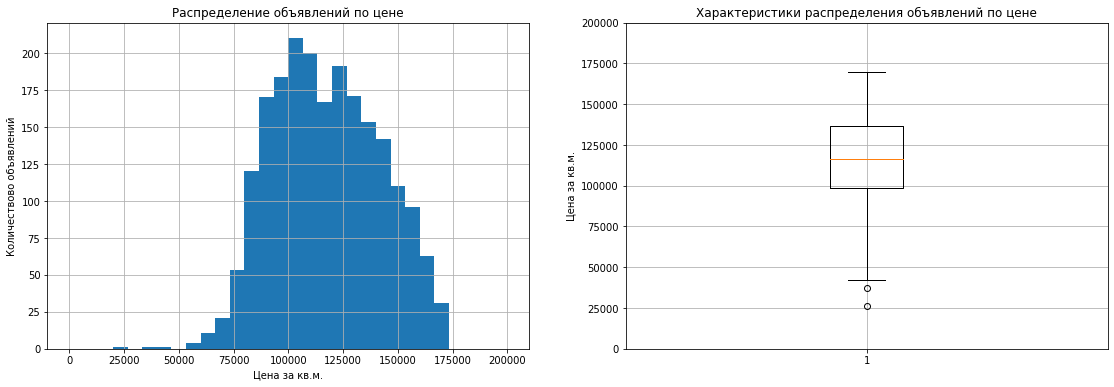

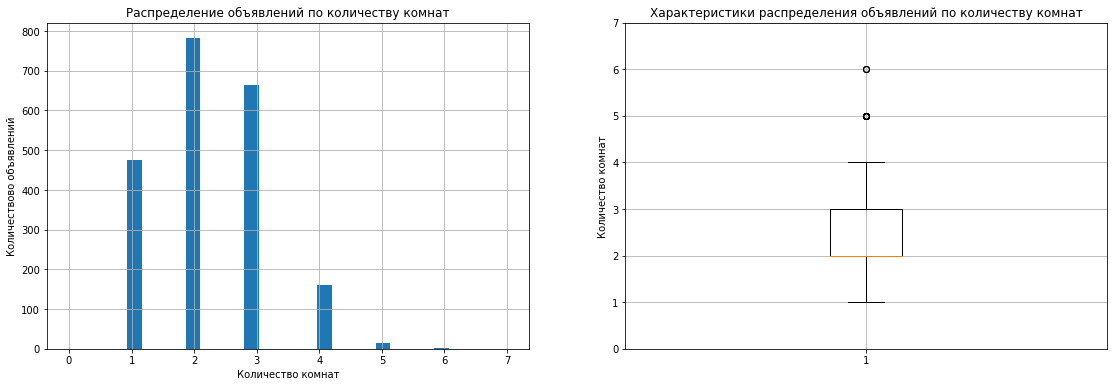

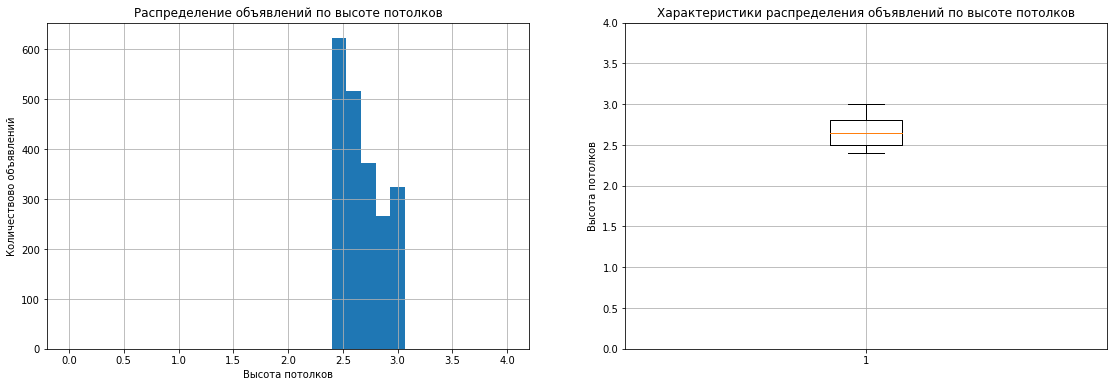

In [66]:
plot_dict = [ 
                {'column': 'total_area', 'title_hist': 'Распределение объявлений по общей площади',
                'title_boxplot': 'Характеристики распределения объявлений по общей площади квартиры',
                'xlabel': 'Общая площадь', 'range': 200},
 
                {'column': 'price_for_m', 'title_hist': 'Распределение объявлений по цене',
                'title_boxplot': 'Характеристики распределения объявлений по цене',
                'xlabel': 'Цена за кв.м.', 'range': 200000}, 
 
                {'column': 'rooms', 'title_hist': 'Распределение объявлений по количеству комнат',
                'title_boxplot': 'Характеристики распределения объявлений по количеству комнат',
                'xlabel': 'Количество комнат', 'range': 7},
 
                {'column': 'ceiling_height', 'title_hist': 'Распределение объявлений по высоте потолков',
                'title_boxplot': 'Характеристики распределения объявлений по высоте потолков',
                'xlabel': 'Высота потолков', 'range': 4}
 
]
 
for dim in plot_dict:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))
 
    ax1.hist(df_spb_center[dim['column']], bins=30, range=(0, dim['range']))
    ax1.grid(True)
    ax1.set_xlabel(dim['xlabel'])
    ax1.set_ylabel('Количествово объявлений')
    ax1.set_title(dim['title_hist'])
 
    ax2.boxplot(df_spb_center[dim['column']])
    ax2.set_ylim(0, dim['range']) 
    ax2.grid(True)
    ax2.set_ylabel(dim['xlabel'])
    ax2.set_title(dim['title_boxplot'])
    plt.show()


In [67]:
df_spb_center['price_for_m'].describe()

count      2100.000000
mean     117571.840610
std       24546.388571
min       26250.000000
25%       98548.611991
50%      116255.023552
75%      136363.636364
max      169960.474308
Name: price_for_m, dtype: float64

В центре все показатели выше: площадь квартир больше, средняя стоимость за кв.м. выше средней стоимости по городу на 10тыс., по количеству комнат преобладают объявления о продаже 2х и 3х комнатных квартир, тогда как в общем случае преобладали 1 и 2 комнаты, и высота потолков в центре выше.

Text(0, 0.5, 'Цена за кв.м.')

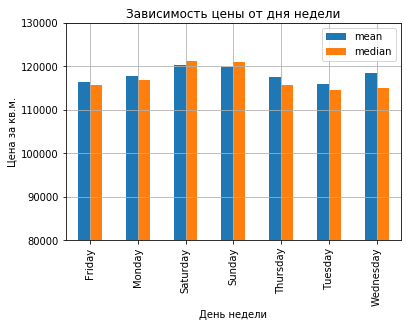

In [68]:
df_group_spb = df_spb_center.pivot_table(index='day_of_week', values='price_for_m', aggfunc={'mean', 'median'}) 
df_group_spb.plot(kind='bar', grid=True).set_ylim(80000,130000)
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена за кв.м.')

Text(0, 0.5, 'Средняя цена за кв.м.')

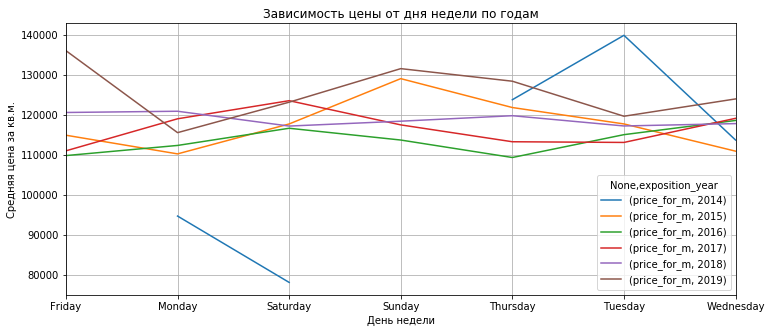

In [69]:
(df_spb_center  
     .pivot_table(index='day_of_week', columns='exposition_year', aggfunc={'price_for_m':'mean'})
     .plot(grid=True, figsize=(12, 5))
) 
plt.title('Зависимость цены от дня недели по годам')
plt.xlabel('День недели')
plt.ylabel('Средняя цена за кв.м.')

Text(0, 0.5, 'Цена за кв.м.')

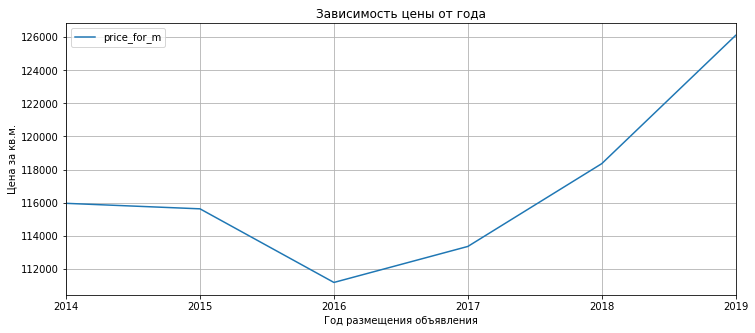

In [70]:
(df_spb_center  
     .pivot_table(index='exposition_year', values='price_for_m', aggfunc='median')
     .plot(grid=True, figsize=(12, 5))
) 
plt.title('Зависимость цены от года')
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена за кв.м.')

Text(0, 0.5, 'Цена за кв.м.')

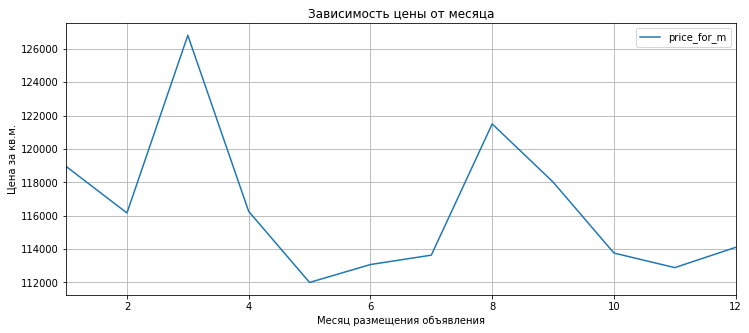

In [71]:
(df_spb_center 
     .pivot_table(index='exposition_month', values='price_for_m', aggfunc='median')
     .plot(grid=True, figsize=(12, 5))
) 
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена за кв.м.')

Text(0, 0.5, 'Цена за кв.м.')

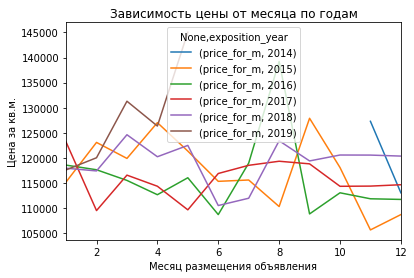

In [72]:
df_spb_center.pivot_table(index='exposition_month', columns='exposition_year', aggfunc={'price_for_m':'mean'}).plot()
plt.title('Зависимость цены от месяца по годам')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена за кв.м.')

Также как и в общем случае, стоимость кв.м. ежегодно растет Взаимосвязи между ценой и датой/месяцем публикации нет.

In [73]:
df_spb_center['rooms'].corr(df_spb_center['price_for_m'])

-0.3392611358028221

In [74]:
df_spb_center['rooms'].corr(df_spb_center['last_price'])

0.5105625891201829

Text(0, 0.5, 'Цена за кв.м.')

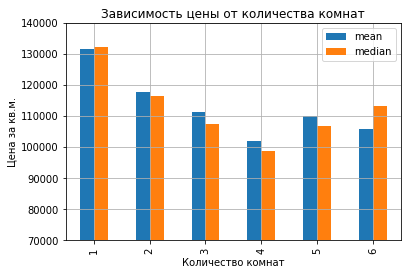

In [75]:
df_spb_group_rooms = df_spb_center.pivot_table(index='rooms', values='price_for_m', aggfunc={'mean', 'median'}) 
df_spb_group_rooms.plot(kind='bar', grid=True).set_ylim(70000,140000)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за кв.м.')

In [76]:
df_spb_center.query('rooms == 6 or rooms == 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_m,floor_category,exposition_year,exposition_month,day_of_week,living_area_to_total,kitchen_area_to_total,cityCenters_km
1842,3,13800000.0,92.0,2015-09-26,5,2.700,5,71.0,2,False,...,835.0,326.0,150000.000000,другой,2015,9,Saturday,0.771739,0.141304,2.0
2017,1,9100000.0,111.0,2017-07-04,6,2.750,3,84.5,3,False,...,54.0,61.0,81981.981982,последний,2017,7,Tuesday,0.761261,0.091892,2.0
3467,12,10000000.0,111.0,2017-11-10,5,2.750,5,87.0,3,False,...,838.0,21.0,90090.090090,другой,2017,11,Friday,0.783784,0.063063,5.0
6106,11,8600000.0,108.1,2018-07-25,5,2.650,5,76.8,2,False,...,726.0,257.0,79555.966698,другой,2018,7,Wednesday,0.710453,0.091582,5.0
7281,11,11500000.0,97.0,2019-02-11,5,2.900,4,75.0,1,False,...,62.0,52.0,118556.701031,первый,2019,2,Monday,0.773196,0.144330,3.0
7722,10,10500000.0,102.8,2019-02-27,5,2.770,2,71.0,1,False,...,771.0,NaN,102140.077821,первый,2019,2,Wednesday,0.690661,0.132296,8.0
9277,10,10000000.0,96.0,2016-02-07,5,3.000,4,55.0,4,False,...,NaN,1060.0,104166.666667,последний,2016,2,Sunday,0.572917,0.103125,5.0
9856,13,12000000.0,106.0,2018-07-30,6,2.800,3,70.0,1,False,...,238.0,NaN,113207.547170,первый,2018,7,Monday,0.660377,0.141509,5.0
13134,5,13400000.0,107.0,2018-11-18,5,3.000,5,56.4,1,False,...,NaN,66.0,125233.644860,первый,2018,11,Sunday,0.527103,0.135607,5.0
13370,11,9500000.0,114.8,2018-11-21,5,3.000,3,86.2,3,False,...,311.0,105.0,82752.613240,последний,2018,11,Wednesday,0.750871,0.067073,2.0


Сохраняется таже тенденция к снижению стоимости кв.м. с увеличением количества комнат. 

Text(0, 0.5, 'Стоимость квартиры')

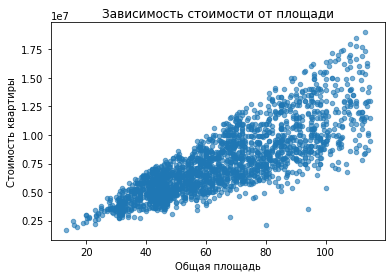

In [77]:
df_spb_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.6)
plt.title('Зависимость стоимости от площади')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость квартиры')

In [78]:
df_spb_center['total_area'].corr(df_spb_center['last_price'])

0.8071112077877547

In [79]:
df_spb_center['total_area'].corr(df_spb_center['price_for_m'])

-0.15580722111919687

Text(0, 0.5, 'Цена за кв.м.')

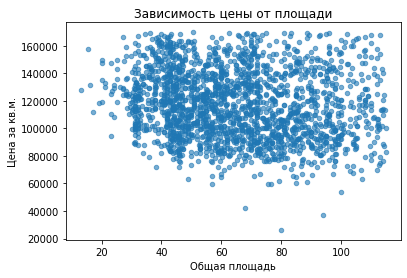

In [80]:
df_spb_center.plot(x='total_area', y='price_for_m', kind='scatter', alpha=0.6)
plt.title('Зависимость цены от площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена за кв.м.')

При увеличении площади жилья, увеличивается и его стоимость, при этом цена за кв.м. не меняется.

Text(0, 0.5, 'Цена за кв.м.')

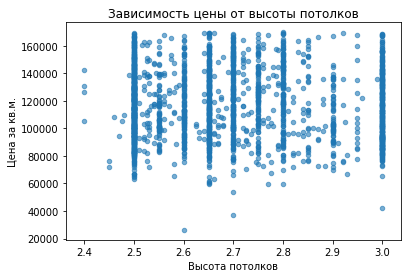

In [81]:
df_spb_center.plot(x='ceiling_height', y='price_for_m', kind='scatter', alpha=0.6)
plt.title('Зависимость цены от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Цена за кв.м.')

In [82]:
df_spb_center['ceiling_height'].corr(df_spb_center['price_for_m'])

-0.03236380594670144

Высота потолков в центре не влияет на цену.

### Шаг 5. Общий вывод <a name="fifth-bullet"></a>

Ключевыми факторами, влияющими на стоимость жилья в Санкт-Петербурге и Лен.Области являются:

* количество комнат – чем их больше, тем общая стоимость квартиры больше, но цена за квадратный метр при этом снижается. То есть, в общем случае, (не беря в расчет элитное жилье, сильно выбивающееся по параметрам от среднего) выходит, что «оптом» дешевле;
* этаж – квартиры, расположенные на первых и последних этажах значительно дешевле всех остальных. В среднем на 15 и 10 тысяч соответственно. Распространено мнение, что на последних этажах могут быть протечки с крыши, а на первых - холод и никакой личной жизни, поэтому и интерес к таким предложениям ниже;
* удаленность от центра – чем дальше от центра, тем дешевле. Если в среднем по Санкт-Петербургу кв.м. стоит 105 тыс., то в центре – 114тыс. В населенных пунктах Лен.области этот показатель не превышает 93тыс.
* Площадь помещения влияет только на общую стоимость квартиры и никак не влияет на стоимость кв.м.
* Высота потолков тоже слабо влияет на цену. 

На протяжении последних трех лет цены на жилье повышались, но не думаю, что это связано именно с фактом наступления следующего года, как, например, с ценами на общественный транспорт. Скорее всего это связано с внешними факторами, событиями, которые происходят в этот период и ситуацией на рынке. Это видно, если смотреть средний ценник по месяцам в разные года – он постоянно меняется то в большую, то в меньшую сторону и нельзя с уверенностью сказать, что в следующем году он точно увеличится.  
